In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/youtube_trending_US.csv')
df.head()

,title,channel,publish_date,category_id,view_count,like_count,comment_count
0,Lil Baby - Otha Boy,LilBabyVEVO,2025-11-12T17:01:01Z,10,247273,23773,2689
1,The Super Mario Galaxy Movie – Official Trailer,Nintendo of America,2025-11-12T14:10:47Z,1,2629340,184045,15861
2,THE BIG FINALE (Dispatch 7 & 8),jacksepticeye,2025-11-12T21:04:26Z,20,499733,64889,6096
3,"Clipse, Pusha T, Malice, Stove God Cooks - F.I...",clipseVEVO,2025-11-12T17:00:06Z,10,250298,37332,2588
4,The Devil Wears Prada 2 | Teaser Trailer,20th Century Studios,2025-11-12T17:00:17Z,1,1864671,56017,2151


In [35]:
category_map = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism"
}

df['category_name'] = df['category_id'].map(category_map)
print(df['category_name'].value_counts())

category_name
Gaming                  110
Music                    42
Entertainment            19
People & Blogs           11
Film & Animation         10
Science & Technology      4
Sports                    2
Howto & Style             1
Comedy                    1
Name: count, dtype: int64


In [37]:
print(df.describe())
print(df['category_id'].value_counts())

       category_id    view_count     like_count  comment_count  like_ratio  \
count   200.000000  2.000000e+02     200.000000     200.000000  200.000000   
mean     17.615000  2.838290e+05   12065.035000    1094.000000    0.054613   
std       6.072988  5.520804e+05   27144.570713    2443.777157    0.041087   
min       1.000000  1.146300e+04     330.000000       0.000000    0.001250   
25%      10.000000  4.616125e+04    1977.500000     171.250000    0.026296   
50%      20.000000  1.204540e+05    4333.000000     340.500000    0.047535   
75%      20.000000  2.638135e+05   10472.750000    1079.000000    0.072545   
max      28.000000  5.226436e+06  293600.000000   25646.000000    0.233708   

       comment_ratio  
count     200.000000  
mean        0.006107  
std         0.006815  
min         0.000000  
25%         0.001557  
50%         0.003898  
75%         0.007654  
max         0.036814  
category_id
20    110
10     42
24     19
22     11
1      10
28      4
17      2
26      

In [38]:
# Engagement ratio for likes and comments
df['like_ratio'] = df['like_count'] / df['view_count']
df['comment_ratio'] = df['comment_count'] / df['view_count']
df.head()

,title,channel,publish_date,category_id,view_count,like_count,comment_count,category_name,like_ratio,comment_ratio
0,Lil Baby - Otha Boy,LilBabyVEVO,2025-11-12T17:01:01Z,10,247273,23773,2689,Music,0.096141,0.010875
1,The Super Mario Galaxy Movie – Official Trailer,Nintendo of America,2025-11-12T14:10:47Z,1,2629340,184045,15861,Film & Animation,0.069997,0.006032
2,THE BIG FINALE (Dispatch 7 & 8),jacksepticeye,2025-11-12T21:04:26Z,20,499733,64889,6096,Gaming,0.129847,0.012199
3,"Clipse, Pusha T, Malice, Stove God Cooks - F.I...",clipseVEVO,2025-11-12T17:00:06Z,10,250298,37332,2588,Music,0.149150,0.010340
4,The Devil Wears Prada 2 | Teaser Trailer,20th Century Studios,2025-11-12T17:00:17Z,1,1864671,56017,2151,Film & Animation,0.030041,0.001154


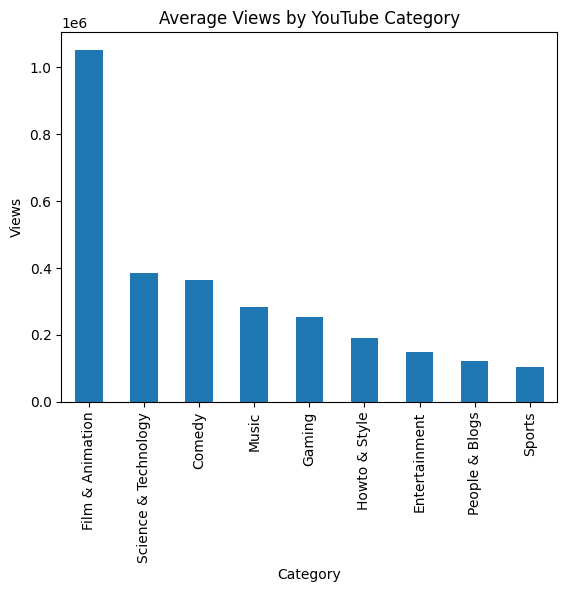

In [46]:
# Top categories by average views
views_by_cat = df.groupby('category_name')['view_count'].mean().sort_values(ascending=False)
views_by_cat.plot(kind='bar', title='Average Views by YouTube Category')
plt.xlabel('Category')
plt.ylabel('Views')
plt.show()


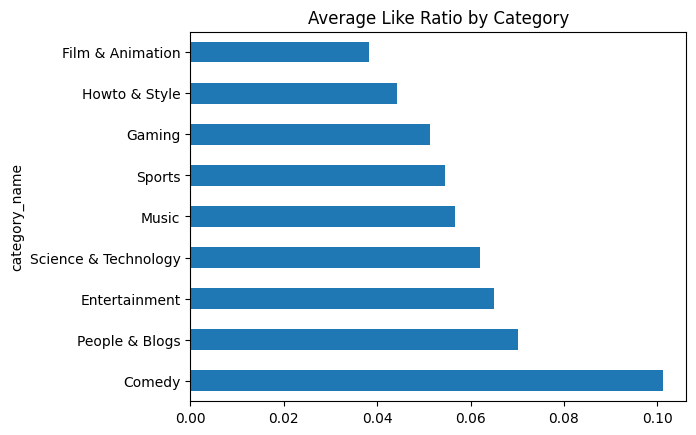

In [48]:
df.groupby('category_name')['like_ratio'].mean().sort_values(ascending=False).plot(kind='barh', title='Average Like Ratio by Category')
plt.show()